In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [4]:
# Loading dataset
df = pd.read_csv('Life_Expectancy_00_15.csv', sep=';')

In [5]:
df.head()

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              1904 non-null   object 
 1   Year                                                 1904 non-null   int64  
 2   Continent                                            1904 non-null   object 
 3   Least Developed                                      1904 non-null   bool   
 4   Life Expectancy                                      1904 non-null   float64
 5   Population                                           1904 non-null   int64  
 6   CO2 emissions                                        1904 non-null   float64
 7   Health expenditure                                   1904 non-null   float64
 8   Electric power consumption                           1904 non-null  

#### Pandas -  10 Most Populous Contries

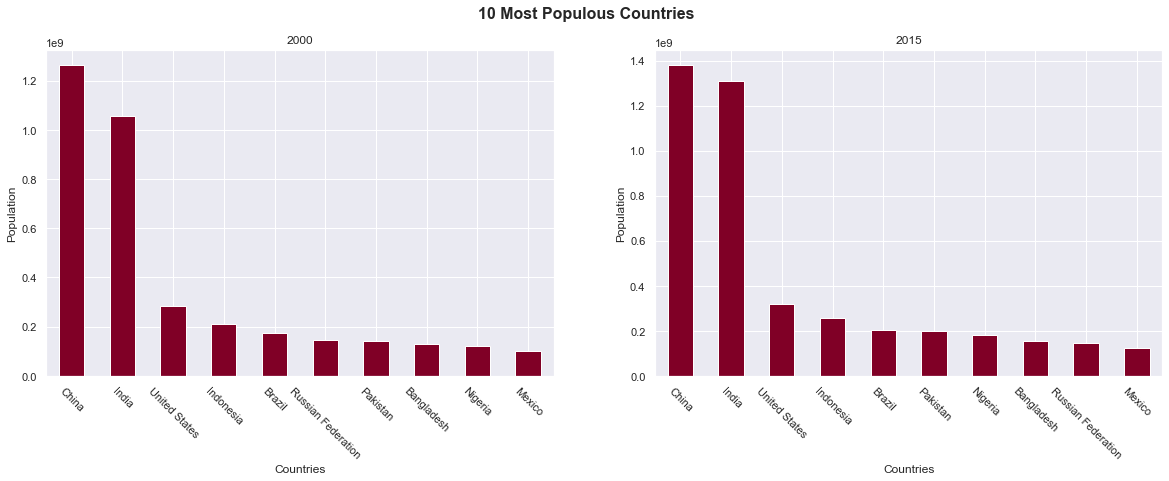

In [85]:
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Filtering dataframe
df_2000 = df[df.loc[:,'Year']==2000].sort_values(by='Population', ascending=False)[0:10]
df_2015 = df[df.loc[:,'Year']==2015].sort_values(by='Population', ascending=False)[0:10]

# Pandas plot
df_2000.plot(ax=ax_1, x='Country', y='Population', kind='bar', title='2000',
            xlabel='Countries', ylabel='Population',
            legend=False,
            colormap='YlOrRd_r')

# Pandas plot
df_2015.plot(ax=ax_2, x='Country', y='Population', kind='bar', title='2015',
            xlabel='Countries', ylabel='Population',
            legend=False,
            colormap='YlOrRd_r')

# Adding some plt customization
plt.suptitle('10 Most Populous Countries', fontweight='bold', fontsize=16)
ax_1.set_xticks(ticks=[i for i in range(10)],labels=df_2000['Country'].values,rotation=-45)
ax_2.set_xticks(ticks=[i for i in range(10)],labels=df_2015['Country'].values,rotation=-45)
plt.show()

In [91]:
# Verify the difference to each country on top 10